# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [35]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [36]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [37]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [35,115,317]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0    688  5491    11091     833              4239           436
1  11134   793     2988    2715               276           610
2   1182  3088     6114     978               821          1637

In [38]:
samples['total'] = samples.apply(np.sum, axis=1)
samples

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen  total
0    688  5491    11091     833              4239           436  22778
1  11134   793     2988    2715               276           610  18516
2   1182  3088     6114     978               821          1637  13820

In [39]:
samples_ratio = samples.iloc[:,:-1].copy()
samples_ratio = samples_ratio.div(samples['total'], axis='index')
samples_ratio['total'] = samples_ratio.apply(np.sum,axis=1) #Just to check...
samples_ratio

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen  \
0  0.030205  0.241066  0.486917  0.036570          0.186101      0.019141   
1  0.601318  0.042828  0.161374  0.146630          0.014906      0.032944   
2  0.085528  0.223444  0.442402  0.070767          0.059407      0.118452   

   total  
0    1.0  
1    1.0  
2    1.0

### I will try to see on which percentiles are those consumers for each category

In [40]:
description = data.describe()
quartiles = description.loc[['25%','50%','75%']]
quartiles

Fresh     Milk   Grocery   Frozen  Detergents_Paper  Delicatessen
25%   3127.75  1533.00   2153.00   742.25            256.75        408.25
50%   8504.00  3627.00   4755.50  1526.00            816.50        965.50
75%  16933.75  7190.25  10655.75  3554.25           3922.00       1820.25

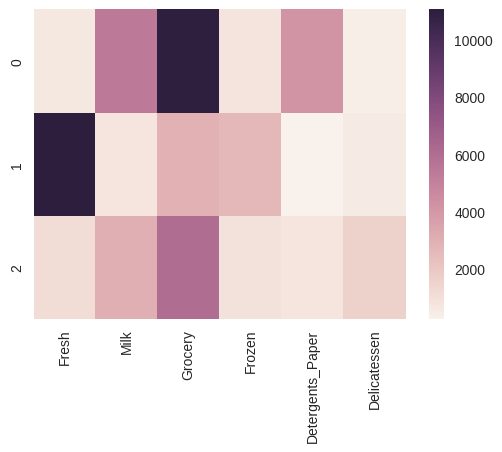

In [41]:
import seaborn as sns
sns.heatmap(samples.iloc[:,:-1])

## "Internal relative weights"

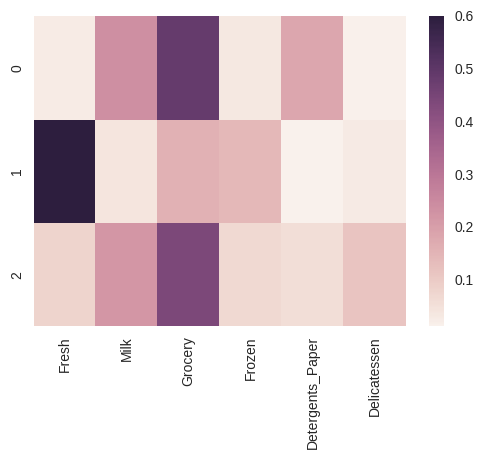

In [42]:
sns.heatmap(samples_ratio.iloc[:,:-1])

In [43]:
def get_quartiles(row,quartiles):
    '''This function gets a row (customer) and returns in which quartile is each feature for that row'''
    m = quartiles.shape[0] # Number of quartile boundaries
    N = quartiles.shape[1] # Number of features
    
    labels = np.zeros(N)
    
    for j in range(N):
        for i in range(m):
            if row.iloc[j]>quartiles.iloc[i,j]:
                labels[j] += 1
    
    return labels

In [44]:
get_quartiles(samples.iloc[0,:],quartiles)

array([ 0.,  2.,  3.,  1.,  3.,  1.])

In [45]:
samples_quartiles = pd.DataFrame(columns=samples.iloc[:,:-1].columns)
for i in range(len(samples)):
    samples_quartiles.loc[i] = get_quartiles(samples.iloc[i,:],quartiles)
samples_quartiles

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0    0.0   2.0      3.0     1.0               3.0           1.0
1    2.0   0.0      1.0     2.0               1.0           1.0
2    0.0   1.0      2.0     1.0               2.0           2.0

## "External relative weights"

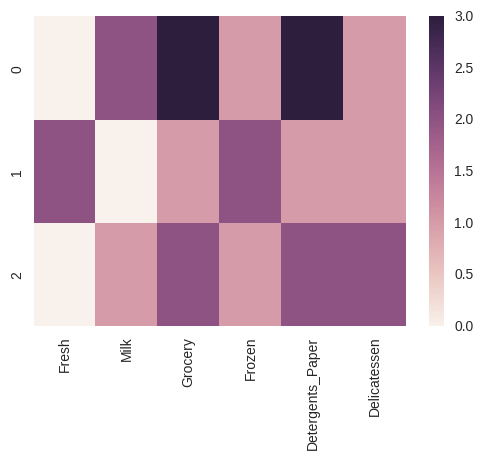

In [46]:
sns.heatmap(samples_quartiles)

## The heatmap above characterizes relatively well the differences in the clients, compared with the different features' quartiles of the dataset.

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** To try to decide the kind of establishment each one could be, after "playing around" with the data, I elaborated a heatmap, showing in which quartile of consumption each client is, for each of the features (it can be seen above). I will base my answer, mostly, on that heatmap, and on another showing the fraction of the total expenses of each establishment, for each feature. That is, I will base my answer on "external relative weights" and "internal relative weights" of expenses.

- Establishment 1) I think this could be a fast food restaurant. It spends a lot more than average on groceries, detergent and paper. It also spends in the other items a medium amount (milk mostly). I guess that a fast food restaurant needs a lot of groceries (and some milk) to prepare the food. Also they may need some meat, but that could be frozen. And a lot of paper for the wrappings, and detergent to clean the restaurant (very often, as people is constantly eating there). Looking at the total amount of expenses, it can be seen that it is a medium size establishment.

- Establishment 2) I think this one could be a food market. They sell a lot of fresh food, also frozen, and groceries. They don't buy a lot of paper because they're eco-friendly and ask their customers to take their reusable bags with them. They need to buy some detergent for the cleaning, but as people doesn't eat there (like they did in establishment 1), they only need to clean once a day, or so. It is also a medium size establishment.

- Establishment 3) I think this one could be a nice cofee shop. It is smaller than the other ones. It spends quite much on Delicatessen. As people eats there, they have to clean the shop often and so they buy detergent, but they don't wrap many things, so they don't buy as much paper as Establishment 1. They also offer a lot of different juices and pies, so they buy a lot of groceries.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [47]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.copy().drop('Detergents_Paper',axis=1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data,data['Detergents_Paper'],test_size=0.25,random_state=2016)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=2016)
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
score

0.67340728103214609

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** I tried to predict the "Detergents and Paper" spending. The prediction score is 0.67.

It looks like this feature can be predicted, to a certain extent, from the others. In any case, I think that adding it could improve the customer's spending habits identification, but I wouldn't say it looks like a very necessary feature.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

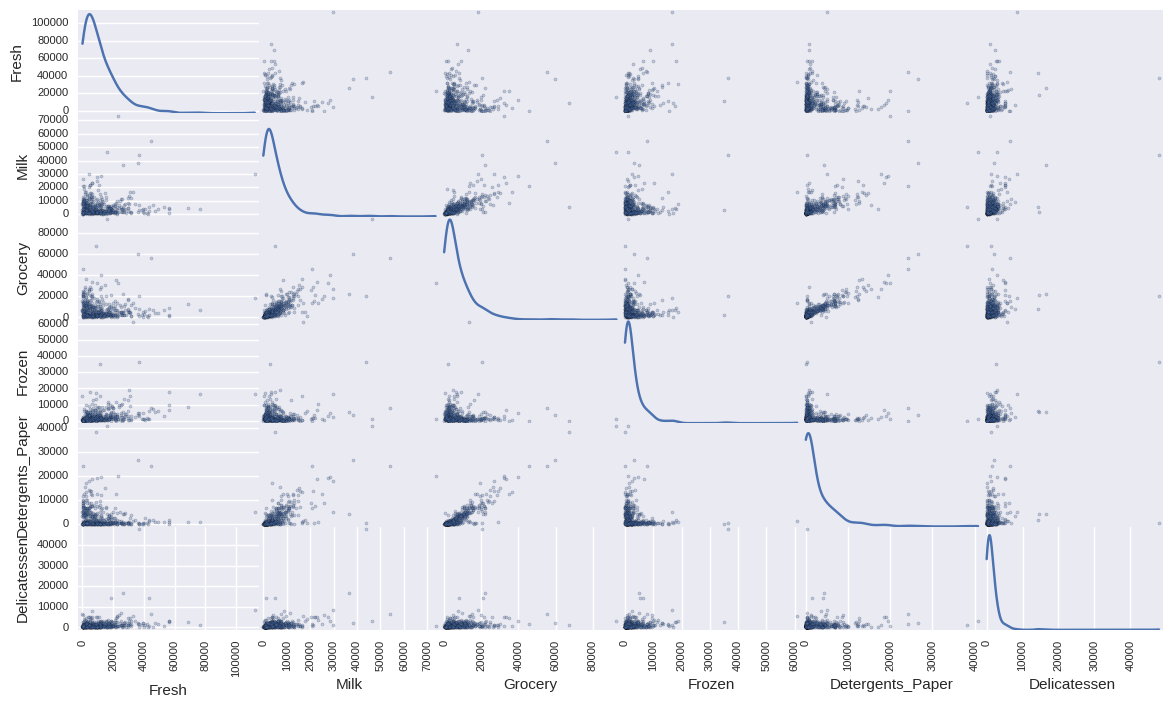

In [48]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** Yes, there seems to be a correlation between "Detergents_Paper" and "Grocery", and also to a less extent, between "Milk" and "Detergents_Paper", and between "Milk" and "Grocery". The correlation seems to be linear.

It does confirm my suspicions about the (low) relevance of "Detergent_Paper". 

It looks like the data cannot be normally distributed, because the distribution is skewed to the right (establishments don't buy a negative amount of items). The mode is at some positive value (different for each feature), close to zero. All the values are positive, and most of the data points lie around the mode, for each feature.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

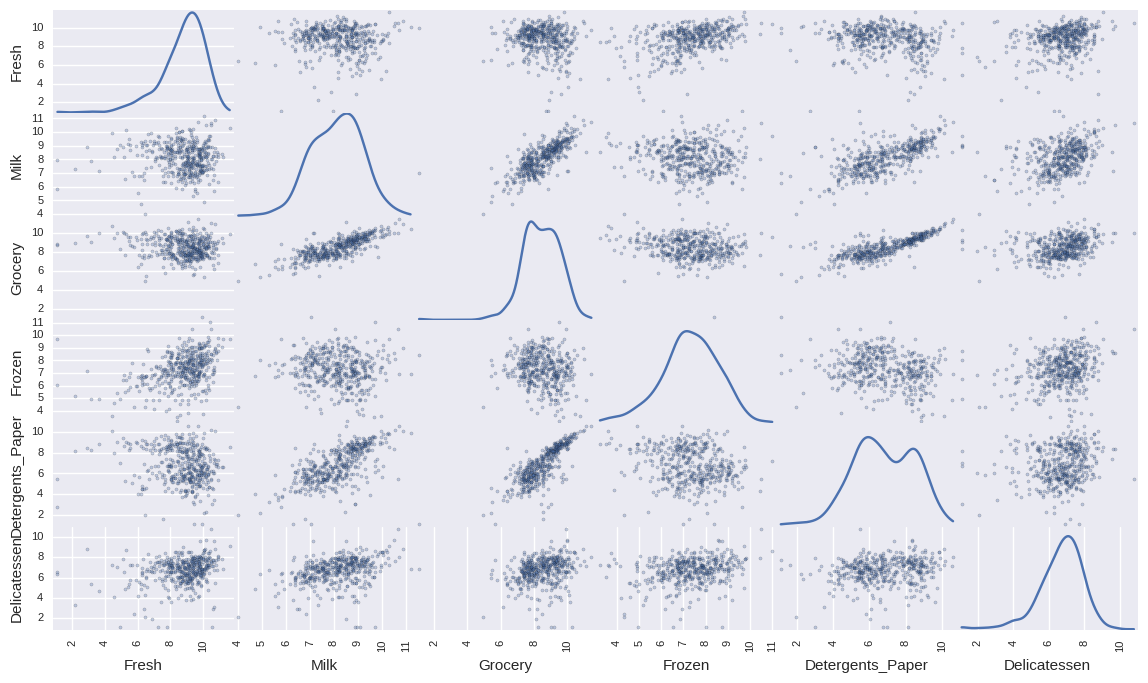

In [49]:
# I should remove the "total" column, just not to mess with the implementations in cells below...
samples = samples.drop('total',axis=1)

# TODO: Scale the data using the natural logarithm
log_data = data.apply(np.log,axis=0)

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(np.log,axis=0)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [50]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  6.533789  8.610866  9.313889  6.725034          8.352083      6.077642
1  9.317759  6.675823  8.002360  7.906547          5.620401      6.413459
2  7.074963  8.035279  8.718337  6.885510          6.710523      7.400621

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [51]:
indexes_temp = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    #Display sample outliers
    if not ((log_samples[feature] >= Q1 - step) & (log_samples[feature] <= Q3 + step)).all():
        print('I have an outlier sample! Feature: %s' % feature)
    
    indexes_temp += list(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index)
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = indexes_temp
print(outliers)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154, 38, 57, 65, 145, 175, 264, 325, 420, 429, 439, 75, 161, 66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]


In [52]:
outlier_counts = pd.DataFrame(columns=['value','counts'])
outlier_counts['value'], outlier_counts['counts'] = np.unique(outliers,return_counts=True)
outlier_counts

value  counts
0      38       1
1      57       1
2      65       2
3      66       2
4      75       2
5      81       1
6      86       1
7      95       1
8      96       1
9      98       1
10    109       1
11    128       2
12    137       1
13    142       1
14    145       1
15    154       3
16    161       1
17    171       1
18    175       1
19    183       1
20    184       1
21    187       1
22    193       1
23    203       1
24    218       1
25    233       1
26    264       1
27    285       1
28    289       1
29    304       1
30    305       1
31    325       1
32    338       1
33    343       1
34    353       1
35    355       1
36    356       1
37    357       1
38    412       1
39    420       1
40    429       1
41    439       1

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** Yes, there are four points that are considered outliers for two features, and one point that is considered outlier for three features.

I think they should be removed: The decision of removing or not removing the outliers will depend on the problem to be solved. For example, if the objective was "Anomaly Detection", of course the outliers should not be removed, as detecting them is the sole purpose of the algorithms. But on this case, as we want to find "segments" of customers, the outliers could cause some undesirable behaviours. For example, a k-means algorithm could detect a single outlier as a "cluster", or the outlier could influence a lot the value of the mean of one "real" cluster. To be sure if removing them is the correct decision, some information about the "next steps" to be taken is helpful. As it is not normally the case to have that information in detail, it may be a good idea to keep a copy of the original dataset to compare, later, in case of doubts.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

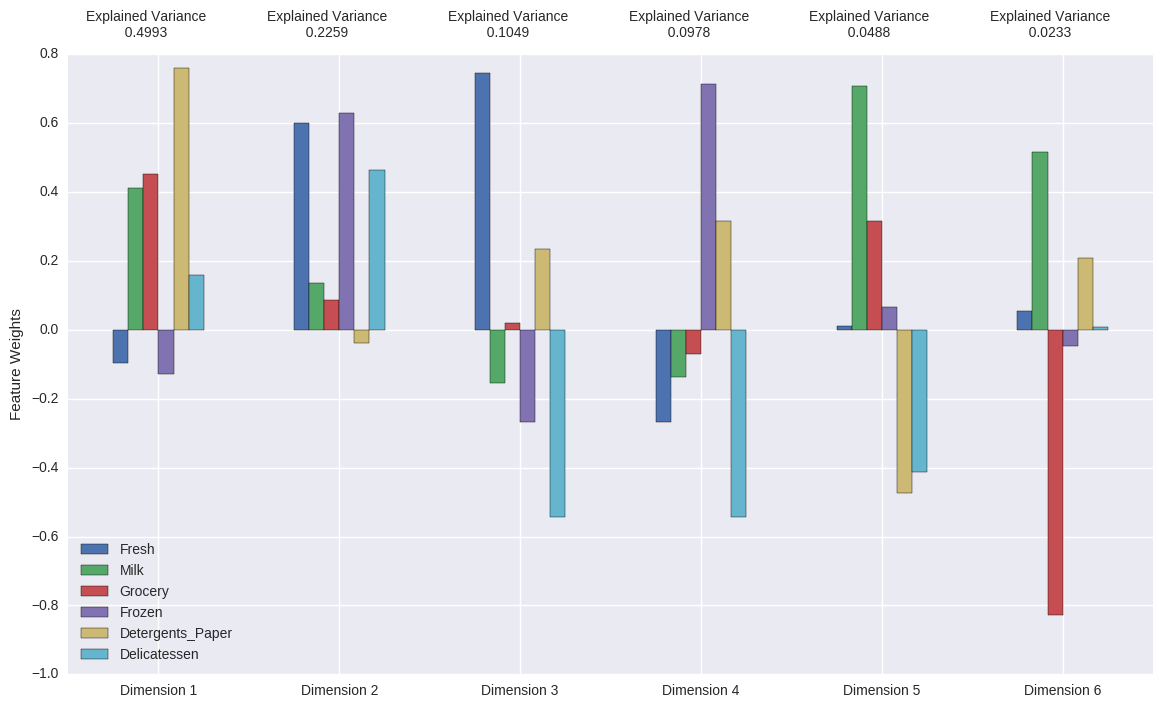

In [53]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [54]:
ev_ratio = pca.explained_variance_ratio_
print(ev_ratio)
print('Explained variance of the first 2 components: %f'%(ev_ratio[0]+ev_ratio[1]))
print('Explained variance of the first 4 components: %f'%np.sum(ev_ratio[:4]))

[ 0.49930484  0.22594807  0.10488309  0.09781761  0.04879109  0.0232553 ]
Explained variance of the first 2 components: 0.725253
Explained variance of the first 4 components: 0.927954


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** The explained variance of the first and second principal component is 0.72 .

The explained variance of the first four principal components is 0.93 .

- The first component determines how much the customer spends in the "Detergents, Paper, Groceries, Milk" set of products. There was a clear positive correlation between those types of products, so it is not surprising that they come together on a single component. It could be resumed in the "Raw Products Consumption" label, maybe.

- The second component determines how much the customer spends in the "Fresh, Frozen and Delicatessen" set of products. It could be resumed in the "Elaborate Products Consumption" label, perhaps, although "Fresh" products may not be so "Elaborate". Maybe the right label is "Expensive Products Consumption" (as normally "elaborate" and "fresh" products are expensive).

- The third component shows the difference in spending between "Fresh, Detergents & Paper, (could include Groceries)" and "Delicatessen, Frozen, Milk". I think it could be interpreted as the difference between "healthy food" and "not so healthy", maybe.

- The third component shows the difference in spending between "Frozen, Detergents & Paper" and "Delicatessen, Fresh, Milk, Groceries". The most influential original features are "Frozen" and "Delicatessen". I think it is natural to think that customers that offer "Delicatessen" products to their clients are trying to sell very special flavors and great quality, while those who buy "Frozen" products are trying to sell very convenient and practical food, but not necessarily very "special" on its taste. It is reasonable to expect some negative correlation between those.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [55]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0       2.0035      -2.1361      -0.8978       0.8948       0.1140   
1      -1.8279       0.1623       0.3098       0.3089      -0.4075   
2       0.3870      -1.1646      -1.5635      -0.2523      -0.2342   

   Dimension 6  
0      -0.2650  
1      -0.6523  
2      -0.3780

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [56]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [57]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0       2.0035      -2.1361
1      -1.8279       0.1623
2       0.3870      -1.1646

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

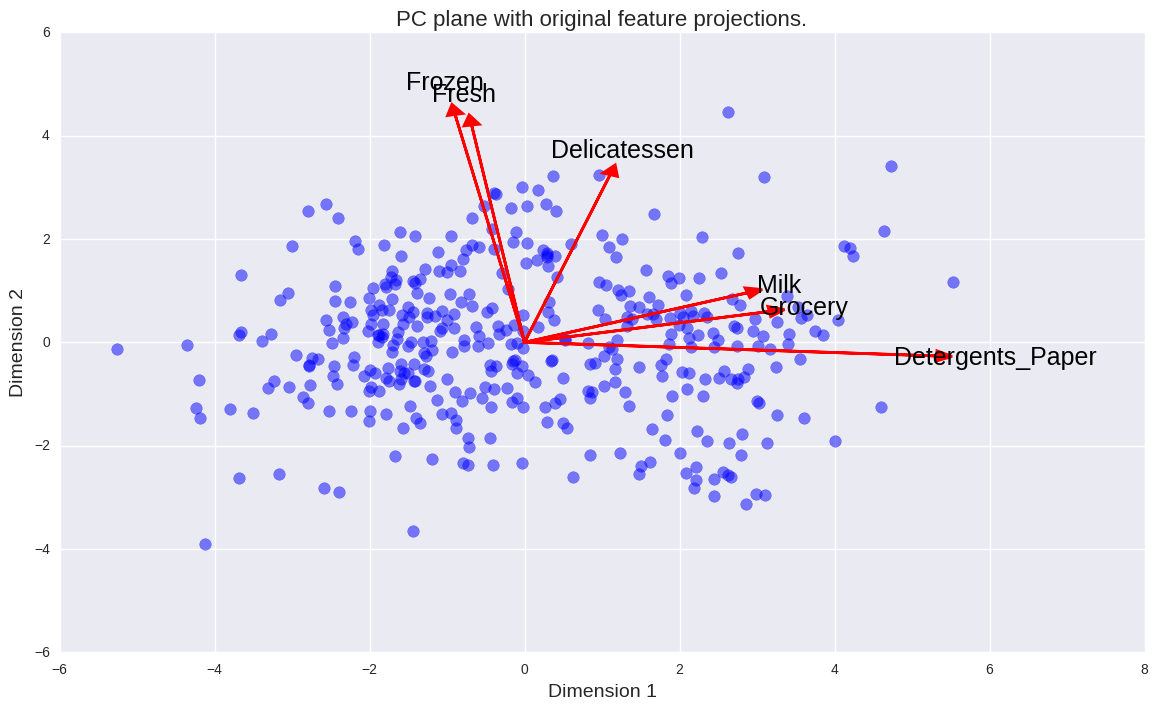

In [58]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** A K-Means clustering algorithm is simple, fast, and converges in a finite number of steps (that last one may not be so important, as "finite" may still be too big sometimes).

A Gaussian Mixture Model clustering algorithm allows to assign probabilities of belonging to different clusters instead of "hard choices". It will normally be more precise than K-means, if there are real underlying Gaussian processes going on (and probably also if there is a process with a similar-to-gaussian distribution).

I would rather use a Gaussian Mixture Model because the data seemed to be normally distributed (even if some of the features seemed to have multi-modal gaussian distribution). Also, in the PCA components plot, above, it can be seen that the possible clusters seem to be "mixed", in the sense that there are many "unconclusive points" (it's not clear to which cluster they may belong). I think a GMM algorithm will do a better job than K-meanss on this case. Also the amount of clients and/or features is not too big, so the speed of the algorithm is not expected to be an issue.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

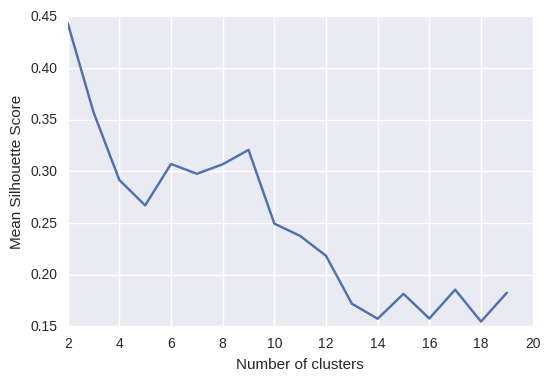

In [59]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

scores = []
n_comp_list = range(2,20)
for n_components in n_comp_list:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GMM(n_components=n_components)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_
    
    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    scores.append(score)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(n_comp_list,scores)
plt.xlabel('Number of clusters')
plt.ylabel('Mean Silhouette Score')

In [60]:
print(scores)

[0.44360147401514627, 0.35729451424912573, 0.29164636837674707, 0.26704489786610613, 0.30712286644732789, 0.29764262787392137, 0.30678802912614472, 0.32073615696452762, 0.24941088808706494, 0.23748965413120912, 0.21826710127339155, 0.17193213153723963, 0.15732288852651863, 0.18146898434289443, 0.15755570255751758, 0.18548447498840431, 0.15461671147703124, 0.182478801758096]


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** The scores for different cluster numbers can be seen in the plot above, and in the results of the variable "scores".

The best silhouette score is for 2 clusters. There are also some interesting clusterings with 3, 6, 7, 8 and 9 clusters, but all of them with considerably worse silhouette score.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [61]:
clusterer = GMM(n_components=2)
clusterer.fit(reduced_data)

preds = clusterer.predict(reduced_data)

centers = clusterer.means_

sample_preds = clusterer.predict(pca_samples)

score = silhouette_score(reduced_data,preds)

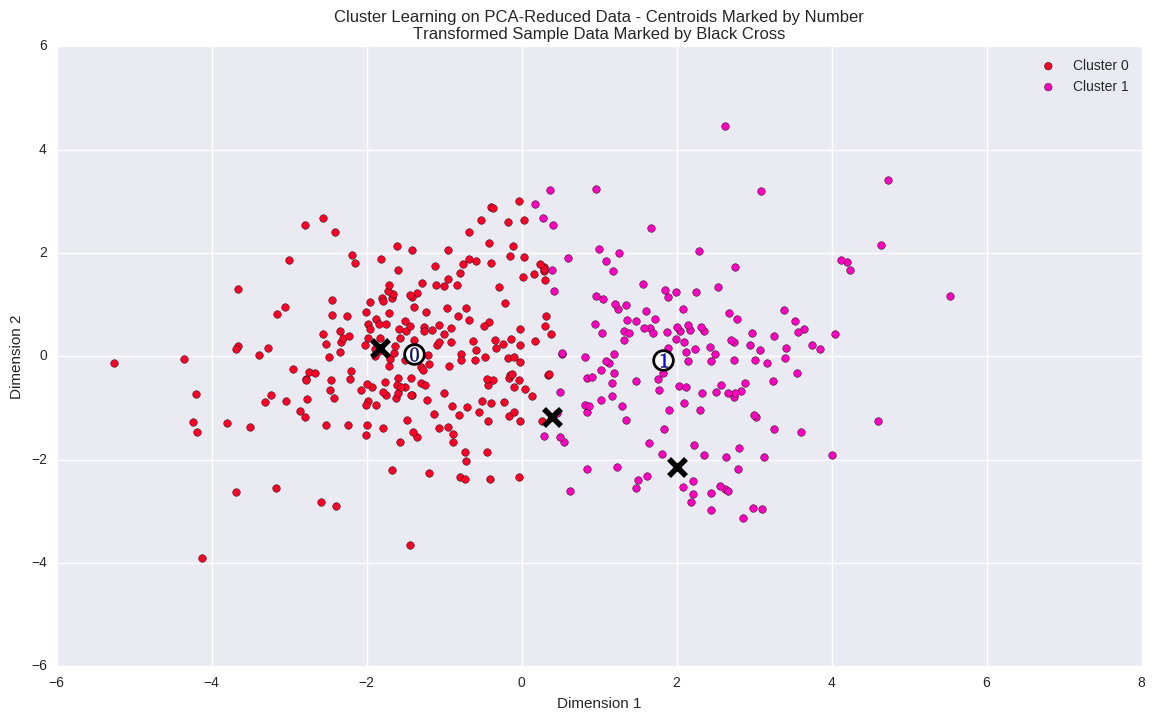

In [62]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [63]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  8967.0  1920.0   2437.0  2081.0             309.0         741.0
Segment 1  6079.0  7042.0  10241.0  1275.0            3546.0        1159.0

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

In [64]:
totals = true_centers.apply(np.sum,axis=1)
totals

Segment 0    16455.0
Segment 1    29342.0
dtype: float64

In [65]:
centers_quartiles = pd.DataFrame(columns=true_centers.columns)
for i in range(len(true_centers)):
    centers_quartiles.loc[i] = get_quartiles(true_centers.iloc[i,:],quartiles)
centers_quartiles

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0    2.0   1.0      1.0     2.0               1.0           1.0
1    1.0   2.0      2.0     1.0               2.0           2.0

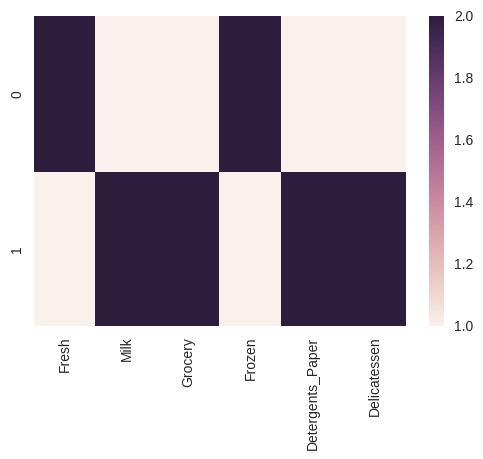

In [66]:
sns.heatmap(centers_quartiles)

**Answer:** Clearly the customers in segment 0 buy Milk, Groceries, Detergents & Paper, and Delicatessen, while customers in segment 1 buy mostly Fresh and Frozen Food. Also, customers in segment 0 spend about twice, in total, the amount that customers in segement 1 do.

I would guess that segment 1 represents small and medium food markets, that mostly buy "ready to sell" products, and sell them.

For segment 0 I am not so sure but it could represent restaurants, fast food sellers, coffee shops (big ones), or even some supermarkets. I am thinking about big establishments that will use the raw materials to produce some new product or give a service (like cleaning, or wrapping the products, for example).

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [67]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


### I will copy the heatmap from Question 1 here

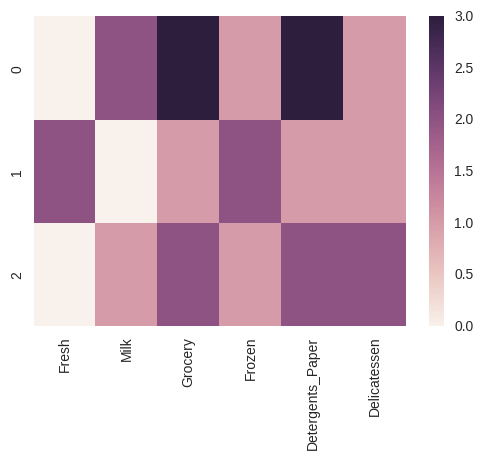

In [68]:
sns.heatmap(samples_quartiles)

**Answer:** Looking at the heatmap above, I can say that:

- Sample point 0 has above average spending in Detergents & Paper, Grocery and Milk, and below average spending in Fresh and Frozen food. That is similar to the spending distribution of the center of Segment 1, and it is consistent with the prediction of the clustering algorithm (Cluster 1).

- Sample point 1 has above average spending in Fresh and Frozen food, and below average spending in Milk, Grocery, Detergents & Paper and Delicatessen. That is similar to the spending distribution of the center of Segment 0, and it is consistent with the prediction of the clustering algorithm (Cluster 0).

- Sample point 2 has above average spending in Grocery, Detergents & Paper and Delicatessen, and below average spending in Fresh and Frozen food. That is similar to the spending distribution of the center of Segment 1, and it is consistent with the prediction of the clustering algorithm (Cluster 1).

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** The distributor could pick a random sample from customers on each of the segments (e.g.: 5% or 10% for each segment), and change the delivery service from 5 days a week to 3 days a week for those customers. Based on the reaction of that sample on each of the segments, it could be assumed that the whole segment will react the same way, and (perhaps progressively) change the service for that customer segment (probably not 100% immediately, but taking, for example, a new 30% sample, then 60% and 100%, and evaluating, or something similar). For the sample of the segment that reacted negatively, the distributor can return to give to the old delivery service.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** The most basic approach would be to assign the new customers to the customer segment of the "nearest-cluster-mean", based on the anticipated annual spendings. Based on the predicted "customer segment" the distributor would choose the most appropriate delivery service. I would use the Mahalanobis distance, as the model is a Mixture of Gaussians, to get the nearest. The target variable is clearly the "customer segment".

Another possibility (a bit more complicated initially, but I think that would work better in the long term) is to train a supervised learner on the old customers data, using as a target variable the "customer_segment". Then, when new clients arrive the distributor can use the predictions of that learner to decide the most appropriate delivery service. The classifier can be evaluated with cross-validation and test-train splits. One advantage of using this approach is that, if using a parametric model, the amount of data to save will be very small (only the model parameters). It also has an additional advantage that is "online learning": after the initial training of the classifier with the clusters' labels (a rough approximation), the individual labels of the new clients and even from the old ones, can be changed according to their responses and complaints about the delivery system. That process would be very fast and efficient for most supervised methods, but doing so for the unsupervised methods discussed above, would take a full retraining (as far as I know), and also the supervised model could get to explain more complex relations in the long term. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

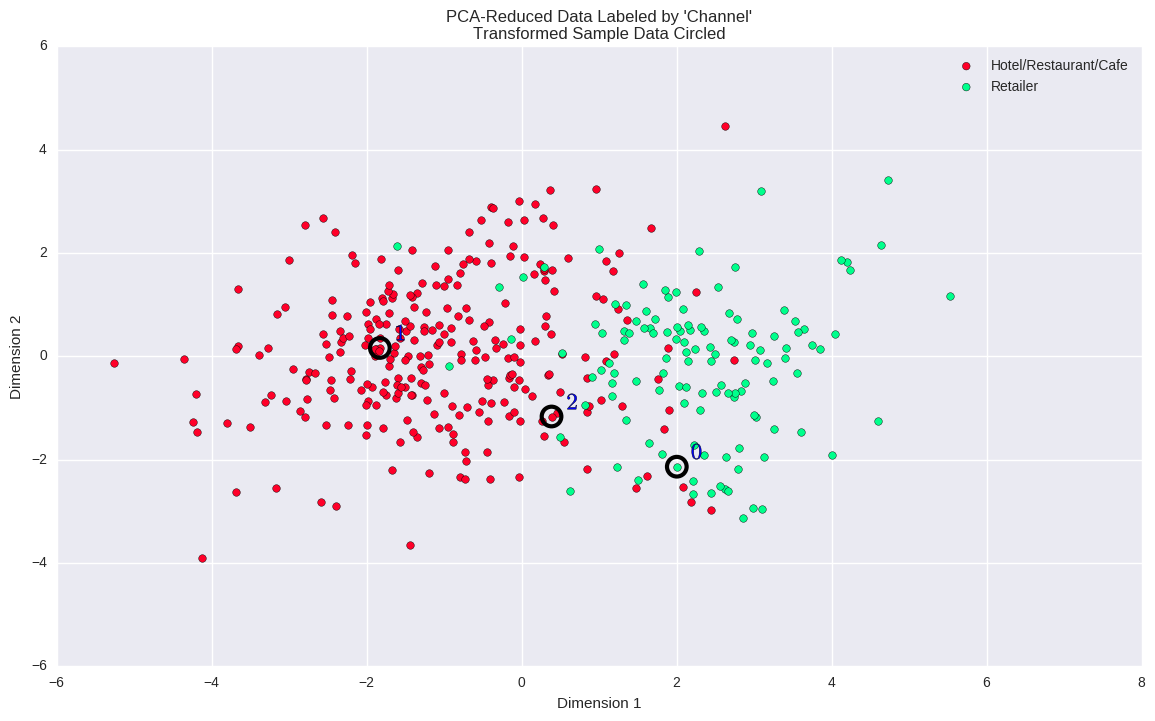

In [69]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** The clustering algorithm and number of clusters I've choosed seem to be doing a very good job in identifying the underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers. 

I think the clients with the most positive values for Dimension 1 could be classified as purely 'Retailers' and the ones with the most negative values for Dimension 1 as purely 'Hotels/Restaurants/Cafes'.

I think these classifications are totally consistent with my previous definition of the customer segments, as can be seen comparing with my answer in Question 9 (in fact I was surprised that there was so much coincidence between my guesses and intuitions and the "hidden variable", but after all, it was a guided exercise... I failed to think about "Hotels" though, and included "Supermarkets", but on the whole the idea of "Retailers" vs "Producers of goods or services from raw material" was correct).

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.